In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
x = iris.data[:, :2] # 데이터 중 처음 2개의 feature (속성) 가져오기
y = iris.target

In [6]:
# multi class 가능하도록 옵션을 설정
logreg = LogisticRegression(C = 1e5, solver = 'lbfgs', multi_class = 'multinomial')
# 2개 중 1개를 예측하는 것이 아니기 때문에 multinomial 사용함

In [7]:
# 데이터 훈련
logreg.fit(x, y)

LogisticRegression(C=100000.0, multi_class='multinomial')

In [14]:
x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [15]:
xx, yy

(array([[3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        ...,
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ]]),
 array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
        [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
        [1.54, 1.54, 1.54, ..., 1.54, 1.54, 1.54],
        ...,
        [4.86, 4.86, 4.86, ..., 4.86, 4.86, 4.86],
        [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
        [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ]]))

In [16]:
xx.shape

(171, 231)

In [17]:
# 추출한 격자형 데이터로 z를 예측하고자 함
# ravel() : 1차원 배열로 바꾸어 줌
# np.c_ : 연결 시 컬럼으로 붙여서 연결
# z (모델이 예측한 값) >>  iris(붓꽃) 3개의 class 반환

z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
z

array([0, 0, 0, ..., 2, 2, 2])

In [23]:
z.shape

(39501,)

In [25]:
z = z.reshape(xx.shape)
print(z)
z.shape

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


(171, 231)

<ipython-input-31-49c8b31d0864>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z, cmap = plt.cm.Paired)


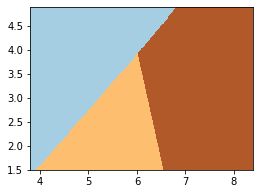

In [31]:
plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx, yy, z, cmap = plt.cm.Paired)
plt.show()

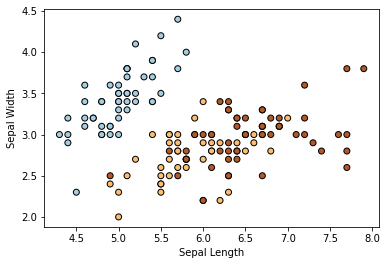

In [26]:
# 원래 iris 관측값인 x를 점으로 찍고 color는 class로 표현하고자 함.
plt.scatter(x[:,0], x[:, 1], c = y, edgecolor = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

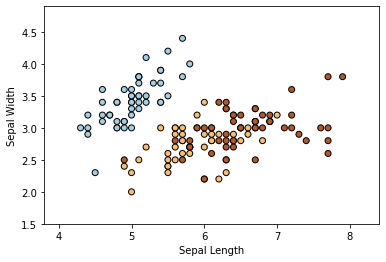

In [28]:
# 원래 iris 관측값인 x를 점으로 찍고 color는 class로 표현하고자 함.
plt.scatter(x[:,0], x[:, 1], c = y, edgecolor = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# 좌표계의 min과 max 설정
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.show()

<ipython-input-32-2a7610b90d1d>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z, cmap = plt.cm.Paired)


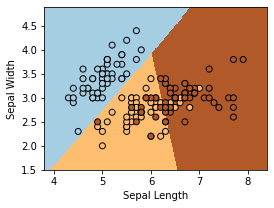

In [32]:
plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx, yy, z, cmap = plt.cm.Paired)

# 원래 iris 관측값인 x를 점으로 찍고 color는 class로 표현하고자 함.
plt.scatter(x[:,0], x[:, 1], c = y, edgecolor = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# 좌표계의 min과 max 설정
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.show()

In [19]:
import numpy as np
a1 = np.array([[1,2],
               [3,4]])
a2 = a1.ravel()
a2

array([1, 2, 3, 4])